In [1]:
# import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from tensorflow.keras.utils import to_categorical, plot_model
import os

In [2]:
# using onehotencoder
encoding=OneHotEncoder()
encoding.fit([[0],[1]])

OneHotEncoder()

In [3]:
#tomato images
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r"C:\Users\Hp\Downloads\tomatoes"):
    for file in f:
        if'.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoding.transform([[1]]).toarray())

In [4]:
# apple images
paths=[]
for r,d,f in os.walk(r"C:\Users\Hp\Downloads\apples"):
    for file in f:
        if'.jpg' or '.jpeg' in file:
            paths.append(os.path.join(r,file))

for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoding.transform([[0]]).toarray())

In [5]:
data=np.array(data)
data.shape

(290, 128, 128, 3)

In [6]:
result=np.array(result)
result=result.reshape(290,2)

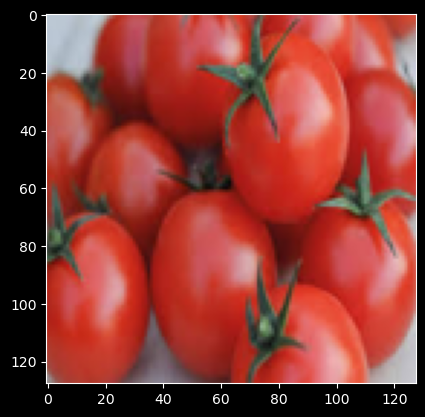

In [7]:
# vistualization

plt.imshow(data[5])

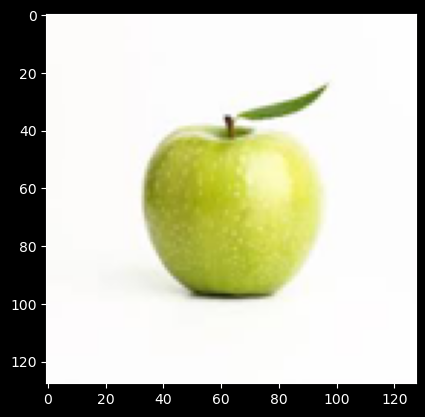

In [8]:
plt.imshow(data[220])

In [9]:
# train&test
x_train,x_test,y_train,y_test=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=32)

In [10]:
# model creation using CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(3, 3),  activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (3,3), activation ='relu', padding = 'Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

print(model.summary())


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      33,554,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,621,922 (128.26 MB)

 Trainable params: 33,621,730 (128.26 MB)

 Non-trainable params: 192 (768.00 B)

None


In [11]:
# model configuration
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [12]:
x_train.shape

(232, 128, 128, 3)

In [13]:
y_train.shape

(232, 2)

In [14]:
# model training

history=model.fit(x_train,y_train,epochs=50,batch_size=64,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.6293 - loss: 13.4762 - val_accuracy: 0.7241 - val_loss: 14.7814
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6552 - loss: 8.8705 - val_accuracy: 0.6034 - val_loss: 1.1492
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7457 - loss: 2.7212 - val_accuracy: 0.5172 - val_loss: 1.4160
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.7500 - loss: 1.0713 - val_accuracy: 0.5862 - val_loss: 0.8193
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8103 - loss: 0.7942 - val_accuracy: 0.5690 - val_loss: 0.8398
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8147 - loss: 0.4979 - val_accuracy: 0.5345 - val_loss: 0.9883
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8879 - loss: 0.3402 - val_accuracy: 0.5862 - val_loss: 0.9845
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8448 - loss: 0.4346 - val_accuracy: 0.5862 - val_loss: 1.0884
Epoch 9/50


In [15]:
# model evaluation
accuracy=model.evaluate(x_test,y_test,batch_size=64)
print("\nTest accuracy:%.1f%%" % (100.0*accuracy[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.6034 - loss: 1.6483

Test accuracy:60.3%
